# KNearest Neighbor

In [95]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]'

In [2]:
%matplotlib inline


In [5]:
df = pd.read_csv('/Filepath/medical_clean 2.csv')
print(df)

      CaseOrder Customer_id                           Interaction  \
0             1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1             2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2             3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3             4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4             5     C544523  5885f56b-d6da-43a3-8760-83583af94266   
...         ...         ...                                   ...   
9995       9996     B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   
9996       9997     P712040  70711574-f7b1-4a17-b15f-48c54564b70f   
9997       9998     R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   
9998       9999     E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   
9999      10000     I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5   

                                   UID          City State        County  \
0     3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan   
1     176354c5eef71

In [7]:
data=df.describe
print(data)

<bound method NDFrame.describe of       CaseOrder Customer_id                           Interaction  \
0             1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1             2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2             3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3             4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4             5     C544523  5885f56b-d6da-43a3-8760-83583af94266   
...         ...         ...                                   ...   
9995       9996     B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   
9996       9997     P712040  70711574-f7b1-4a17-b15f-48c54564b70f   
9997       9998     R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   
9998       9999     E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   
9999      10000     I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5   

                                   UID          City State        County  \
0     3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL   

In [13]:
df_1 = df[['ReAdmis', 'TotalCharge','Initial_days','Age', 'Children', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'Additional_charges']]
print(df_1)

     ReAdmis  TotalCharge  Initial_days  Age  Children    Income  VitD_levels  \
0         No  3726.702860     10.585770   53         1  86575.93    19.141466   
1         No  4193.190458     15.129562   51         3  46805.99    18.940352   
2         No  2434.234222      4.772177   53         3  14370.14    18.057507   
3         No  2127.830423      1.714879   78         0  39741.49    16.576858   
4         No  2113.073274      1.254807   22         1   1209.56    17.439069   
...      ...          ...           ...  ...       ...       ...          ...   
9995      No  6850.942000     51.561220   25         2  45967.61    16.980860   
9996     Yes  7741.690000     68.668240   87         4  14983.02    18.177020   
9997     Yes  8276.481000     70.154180   45         3  65917.81    17.129070   
9998     Yes  7644.483000     63.356900   43         3  29702.32    19.910430   
9999     Yes  7887.553000     70.850590   70         8  62682.63    18.388620   

      Doc_visits  Full_meal

In [14]:
data = df
df = df.dropna()

In [60]:
print(df_1.dtypes)

ReAdmis                object
TotalCharge           float64
Initial_days          float64
Age                     int64
Children                int64
Income                float64
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
Additional_charges    float64
dtype: object


In [62]:
df_1["ReAdmis"].replace({"Yes": "1.0", "No": "0.0"}, inplace=True)
data = df_1['ReAdmis'].value_counts()
print(data)

0.0    6331
1.0    3669
Name: ReAdmis, dtype: int64


In [63]:
df_1["ReAdmis"] = df_1["ReAdmis"].astype("float")
print(df_1.dtypes)

ReAdmis               float64
TotalCharge           float64
Initial_days          float64
Age                     int64
Children                int64
Income                float64
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
Additional_charges    float64
dtype: object


In [64]:
import scipy.stats as stats

z_scores = stats.zscore(df_1)

abs_z_scores = np.abs(z_scores)
filtered = (abs_z_scores < 3).all(axis=1)
df_clean = df_1[filtered]

print(df_clean)



      ReAdmis  TotalCharge  Initial_days  Age  Children    Income  \
0         0.0  3726.702860     10.585770   53         1  86575.93   
1         0.0  4193.190458     15.129562   51         3  46805.99   
2         0.0  2434.234222      4.772177   53         3  14370.14   
3         0.0  2127.830423      1.714879   78         0  39741.49   
4         0.0  2113.073274      1.254807   22         1   1209.56   
...       ...          ...           ...  ...       ...       ...   
9995      0.0  6850.942000     51.561220   25         2  45967.61   
9996      1.0  7741.690000     68.668240   87         4  14983.02   
9997      1.0  8276.481000     70.154180   45         3  65917.81   
9998      1.0  7644.483000     63.356900   43         3  29702.32   
9999      1.0  7887.553000     70.850590   70         8  62682.63   

      VitD_levels  Doc_visits  Full_meals_eaten  Additional_charges  
0       19.141466           6                 0        17939.403420  
1       18.940352           4  

In [65]:
df_clean['Income_log'] = np.log(df_clean['Income'])
df_clean['Initial_days_log'] = np.log(df_clean['Initial_days'])
df_clean['Additional_charges_log'] = np.log(df_clean['Additional_charges'])
df_clean['Age_log'] = np.log(df_clean['Age'])
df_clean['Children_log'] = np.log(df_clean['Children'])
df_clean['VitD_levels_log'] = np.log(df_clean['VitD_levels'])
df_clean['Doc_visits_log'] = np.log(df_clean['Doc_visits'])
df_clean['Full_meals_eaten_log'] = np.log(df_clean['Full_meals_eaten'])
df_clean['TotalCharge_log'] = np.log(df_clean['TotalCharge'])
print(df_clean.var())

ReAdmis               2.322844e-01
TotalCharge           4.754117e+06
Initial_days          6.921340e+02
Age                   4.254082e+02
Children              3.624721e+00
Income                6.430466e+08
VitD_levels           3.952421e+00
Doc_visits            1.082322e+00
Full_meals_eaten      9.537709e-01
Additional_charges    4.289247e+07
Income_log            6.048885e-01
dtype: float64


<ipython-input-65-f60f088184fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Income_log'] = np.log(df_clean['Income'])


Remove variables children, full meals eaten, age, and doc visits due to not being continuous and instead discrete.

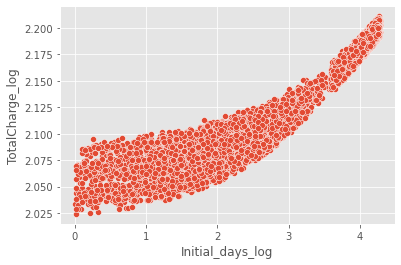

In [133]:
sns.scatterplot(x ='Initial_days_log', y = 'TotalCharge_log', data = df_clean)
plt.show()

In [136]:
df_clean_log = df_clean[['Additional_charges_log', 'Initial_days_log', 'VitD_levels_log', 'Income_log', 'ReAdmis']]
print(df_clean_log.head())

   Additional_charges_log  Initial_days_log  VitD_levels_log  Income_log  \
0                9.794755          2.359511         2.951857   11.368777   
1                9.776392          2.716651         2.941295   10.753766   
2                9.770253          1.562803         2.893562    9.572908   
3                9.472200          0.539343         2.808008   10.590151   
4                8.220545          0.226982         2.858713    7.098012   

   ReAdmis  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  


<function matplotlib.pyplot.show(close=None, block=None)>

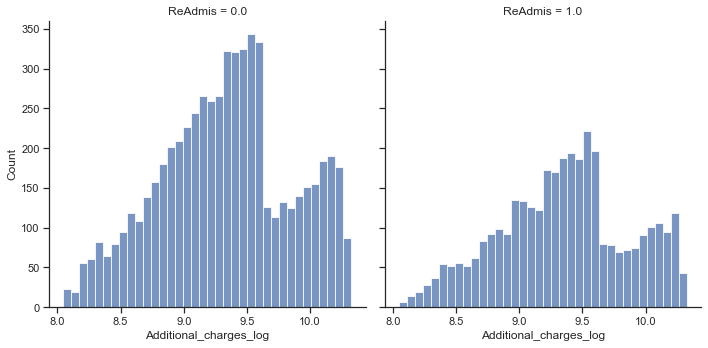

In [140]:
sns.displot(data = df_clean_log, x = "Additional_charges_log", col = "ReAdmis")
plt.show

Remove Addiitonal_charges log as it the histogram shapes have no differences between yes and no readmis response

<function matplotlib.pyplot.show(close=None, block=None)>

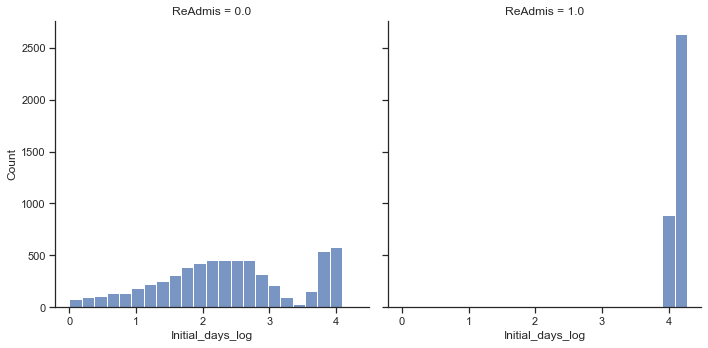

In [141]:
sns.displot(data = df_clean_log, x = "Initial_days_log", col = "ReAdmis")
plt.show

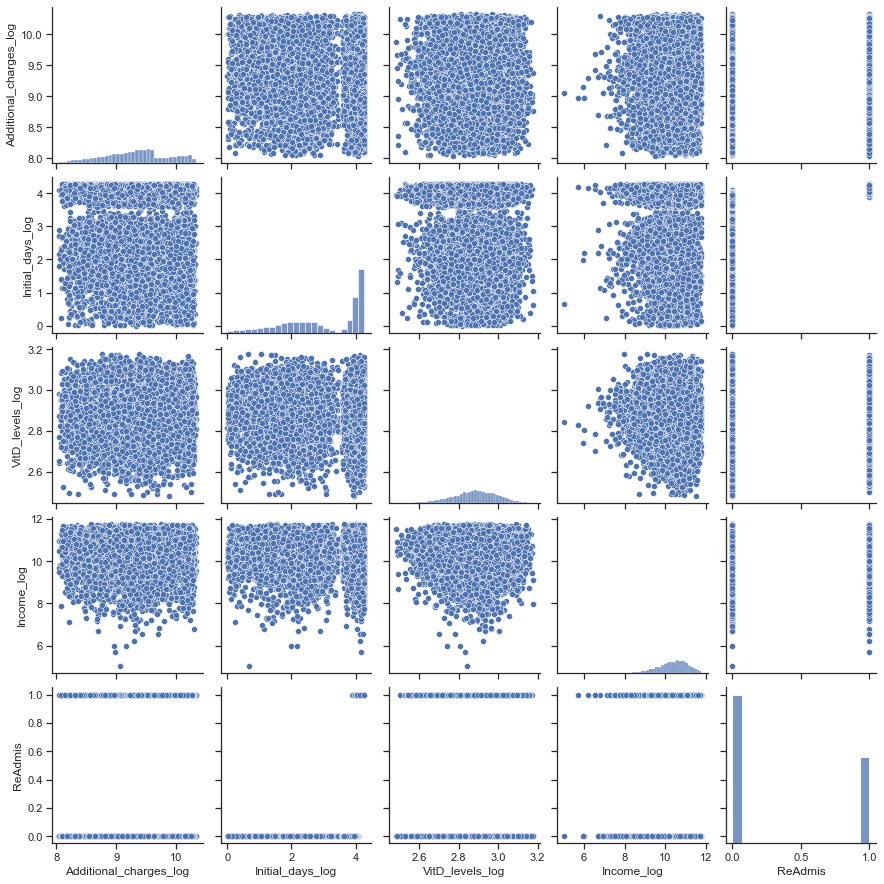

In [138]:
import seaborn as sns
sns.set(style = "ticks", color_codes = True)
sns.pairplot(df_clean_log)
plt.show()

In [73]:
df_clean_1 = df_clean[['VitD_levels_log', 'Income_log', 'ReAdmis']]
print(df_clean_1.head())

   VitD_levels_log  Income_log  ReAdmis
0         2.951857   11.368777      0.0
1         2.941295   10.753766      0.0
2         2.893562    9.572908      0.0
3         2.808008   10.590151      0.0
4         2.858713    7.098012      0.0


In [74]:
print(df_clean_1.shape)

(9599, 3)


In [75]:
print(df_clean_1.var())

VitD_levels_log    0.012588
Income_log         0.604888
ReAdmis            0.232284
dtype: float64


In [76]:
df_clean_1.to_csv(r'/Filepath/medical_df_clean_ss.csv', index = False)

# KNN

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = df_clean_1

X = data.drop('ReAdmis',axis=1)
y = data.ReAdmis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

      VitD_levels_log  Income_log
5348         2.798881    8.964577
8022         2.700457   11.161471
3443         2.857983   11.401534
7348         2.719807   10.710778
1274         2.898186   11.329202
      VitD_levels_log  Income_log
1369         2.827352   10.307292
9901         2.946505   10.163200
7523         2.897580   10.278733
5606         3.001647   11.195747
9552         2.798722    8.229804
5348    0.0
8022    1.0
3443    0.0
7348    1.0
1274    0.0
Name: ReAdmis, dtype: float64
1369    0.0
9901    0.0
7523    0.0
5606    0.0
9552    1.0
Name: ReAdmis, dtype: float64


In [78]:
print(X_train.shape)

(7679, 2)


In [79]:
print(y_train.shape)

(7679,)


In [80]:
X_test.to_csv(r'/Users/kcoddi/Desktop/medical_X_testing_dataset.csv', index = False)
y_test.to_csv(r'/Users/kcoddi/Desktop/medical_y_testing_dataset.csv', index = False)
X_train.to_csv(r'/Users/kcoddi/Desktop/medical_X_training_dataset.csv', index = False)
y_train.to_csv(r'/Users/kcoddi/Desktop/medical_y_training_dataset.csv', index = False)

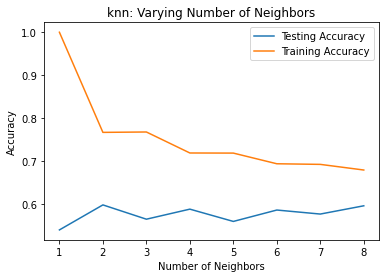

In [91]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('knn: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = "Testing Accuracy")
plt.plot(neighbors, train_accuracy, label = "Training Accuracy")
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [101]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)


0.5953125

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cv_results_5 = cross_val_score(knn, X, y, cv = 5)
print(cv_results_5)
np.mean(cv_results_5)

[0.57083 0.5625  0.56458 0.56875 0.56488]


0.5663088414104569

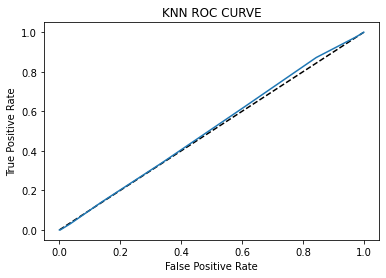

0.5096079683666453

In [107]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = "knn")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC CURVE')
plt.show()
roc_auc_score(y_test, y_pred_prob)

In [126]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[1045  164]
 [ 613   98]]
              precision    recall  f1-score   support

         0.0       0.63      0.86      0.73      1209
         1.0       0.37      0.14      0.20       711

    accuracy                           0.60      1920
   macro avg       0.50      0.50      0.47      1920
weighted avg       0.54      0.60      0.53      1920

